In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from PIL import Image
from io import BytesIO
import pyautogui
import matplotlib.pyplot as plt

# Website URL
website_url = "https://www.eterpride.com"

# Output folder path
output_folder_path = "./mouse_movement_captureee"

# Create the output folder if it doesn't exist
os.makedirs(output_folder_path, exist_ok=True)

# Output CSV file path
output_csv_path = os.path.join(output_folder_path, "mouse_movement.csv")

# Time interval (in seconds) for capturing frames
time_interval = 1

# Frame width and height
frame_width = None
frame_height = None

# Mouse movement data columns
columns = ['Second', 'Frame', 'X', 'Y']

# Initialize lists to store mouse movement data
mouse_movement_data = []

# Initialize the combined frame
combined_frame = None

# Configure Selenium webdriver
chrome_options = Options()
chrome_options.add_argument("--start-maximized")
driver = webdriver.Chrome(options=chrome_options)

# Open the website
driver.get(website_url)

# Wait for the website to load
driver.implicitly_wait(10)

# Capture mouse movement and generate heatmap
frame_count = 0
second_count = 0
capture_interval = int(time_interval * 30)  # Assuming 30 frames per second

while True:
    # Get current webpage screenshot
    screenshot = driver.get_screenshot_as_png()
    screenshot = Image.open(BytesIO(screenshot))
    screenshot = np.array(screenshot.convert("RGB"))

    # Get the frame width and height
    if frame_width is None or frame_height is None:
        frame_height, frame_width = screenshot.shape[:2]

    # Combine frames every capture_interval frames
    if frame_count % capture_interval == 0:
        # Resize frame to match the desired output height
        if combined_frame is None:
            combined_frame = screenshot
        else:
            combined_frame = np.vstack((combined_frame, screenshot))

    # Get mouse cursor position
    x, y = pyautogui.position()

    # Normalize mouse position
    norm_x = x / frame_width
    norm_y = y / frame_height

    # Store mouse movement data for each frame
    mouse_movement_data.append([second_count, frame_count, norm_x, norm_y])

    # Save the current frame as an image
    frame_filename = f"frame_{frame_count}.png"
    frame_path = os.path.join(output_folder_path, frame_filename)
    cv2.imwrite(frame_path, screenshot)

    frame_count += 1

    # Increment second count after every second
    if frame_count % 30 == 0:
        second_count += 1

    # Break the loop after a certain number of frames (for testing)
    if frame_count >= 100:
        break

# Release Selenium webdriver
driver.quit()

# Save the mouse movement data to a CSV file
df = pd.DataFrame(mouse_movement_data, columns=columns)
df.to_csv(output_csv_path, index=False)

# Save the combined frame as an image
combined_screenshot_filename = "combined_screenshot.png"
combined_screenshot_path = os.path.join(output_folder_path, combined_screenshot_filename)
cv2.imwrite(combined_screenshot_path, combined_frame)

# Display the combined frame
cv2.imshow("Combined Screenshot", combined_frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
import pandas as pd

# Path to the CSV file
csv_file_path = "./mouse_movement_captureee/mouse_movement.csv"

# Load the CSV data into a DataFrame
df = pd.read_csv(csv_file_path)

# Display the DataFrame
print(df)


    Second  Frame         X         Y
0        0      0  0.532813  0.959233
1        0      1  0.532813  0.959233
2        0      2  0.526563  0.812950
3        0      3  0.526563  0.812950
4        0      4  0.526563  0.812950
..     ...    ...       ...       ...
95       3     95  0.353125  0.568345
96       3     96  0.192188  0.529976
97       3     97  0.172917  0.453237
98       3     98  0.147917  0.408873
99       3     99  0.147917  0.408873

[100 rows x 4 columns]


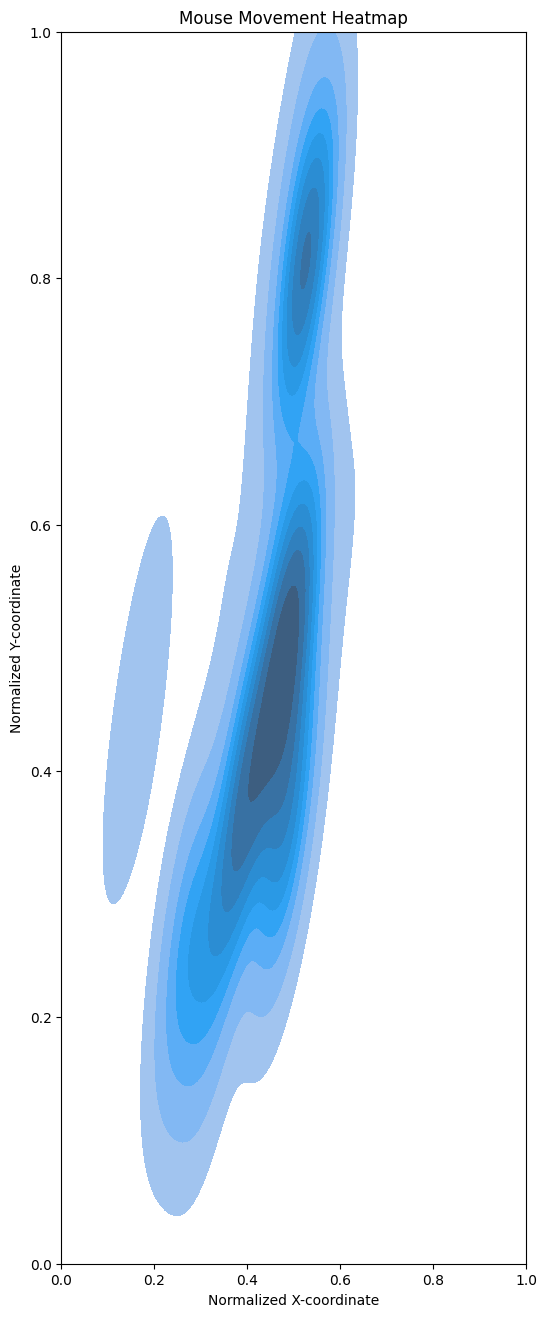

In [3]:
# Generate the heatmap from the mouse movement data
plt.figure(figsize=(6, 16))
sns.kdeplot(data=df, x='X', y='Y', fill=True, thresh=0.05, levels=10)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title('Mouse Movement Heatmap')
plt.xlabel('Normalized X-coordinate')
plt.ylabel('Normalized Y-coordinate')
heatmap_filename = "mouse_movement_heatmap.png"
heatmap_path = os.path.join(output_folder_path, heatmap_filename)
plt.savefig(heatmap_path)
plt.show()

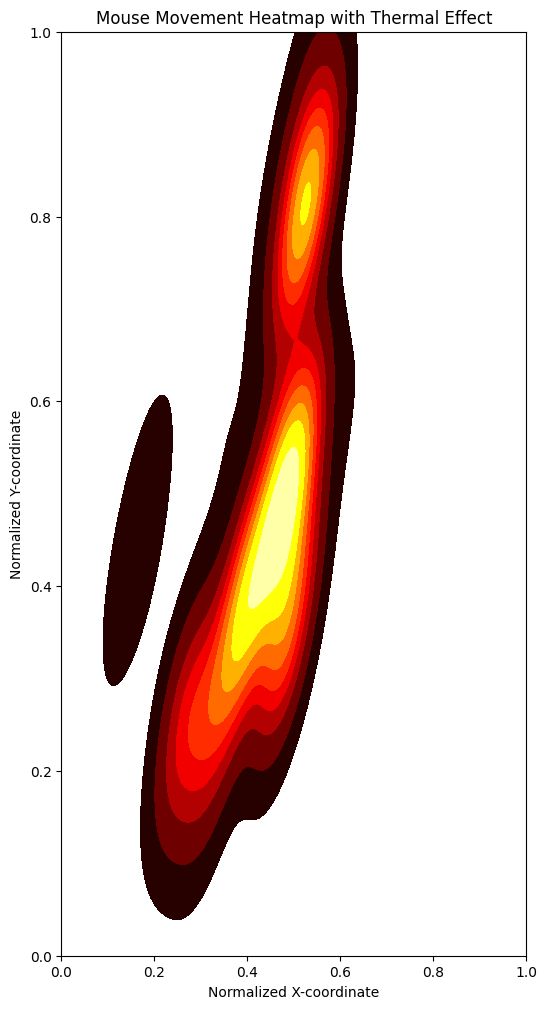

In [10]:
# Generate the heatmap with thermal effect from the mouse movement data
plt.figure(figsize=(6, 12))
sns.kdeplot(data=df, x='X', y='Y', fill=True, thresh=0.05, levels=10, cmap='hot')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title('Mouse Movement Heatmap with Thermal Effect')
plt.xlabel('Normalized X-coordinate')
plt.ylabel('Normalized Y-coordinate')
heatmap_filename = "mouse_movement_heatmap.png"
heatmap_path = os.path.join(output_folder_path, heatmap_filename)
plt.savefig(heatmap_path)
plt.show()